# Predicting the (star)ratings for Dig<font color="#F39C12">iD</font> app

<h3>For this project, the reviews of the DigiD app on the Google Playstore will be analyzed. </h3>

<font color="#5c5c3d"><h2>DigiD</h2></font>

DigiD (Digital Identity) is the system used by governmental agencies to facilitate digital authentication of citizens identities when they apply for an online transaction (Geest & Beldad, 2010). In 2018 DigiD had 13,7 million users, 1,5 per cent more than the year before. Furthermore, it processed 308 million authentications, with an increase of 9,9 per cent compared to 2017 (Logius, 2018). 

<font color="#5c5c3d"><h2>Concept</h2></font>

For this project I will be looking at the reviews by users and try to find how users experience DigiD.
In this case, several are scenarios possible; 

<li> Users log's in successfully, gains experience and can progress. </li>
    
<li> Alternatively, the user encounters difficulty using the app. Either apps' functionality or user interface is suboptimal, or the user lacks online experience, technical or functional understanding. </li>
    
>Either way, the user fails with a specific function of Digid; preventing them from progressing to a higher level of reliability and thus eroding the trust in the relationship with DigiD. By examening the reviews, obsticals can by identified and funcionalities improved.  

<font color="#5c5c3d"><h2>Text mining & predicting ratings</h2></font>

The reviews will be processed and analysed with text mining. "The text mining method estimates its results based on the actual existence of a research term, which can be stronger than other methods that base their conclusions on simple contextual data or the authors' opinions." (Abu-Shanab and Harb, 2019, p.3) Text  mining further estimates the terms or trends in data and is fitting for use with a significant amount of keywords, making text mining more accurate and observable than other methods (Abu-Shanab and Harb, 2019). Additionally, Pelsmackers'study (2018) found that highly involved individuals are more motivated to process central information in a text review than less involved people. There reviews will have the significant impact on
possible future consumers looking for information. By looking into possible predictors for ratings, this gives insight for developers and companies, in this case, the Dutch government.


<font color="#5c5c3d"><h2>About the data </h2></font>
<font color=" #8a8a5c"><h3>Retrieving the data </h3></font>

The data is collected from the Google Play store. This was challenging, because Google prevents the scraping of user reviews.
After many struggles to retrieve the data, I finally managed it. I saved the page and then used BeautifulSoup to scrape the name, date, review and stars. This was Erik's idea. 

<i>Users names will only be used to identify the review. Other than that, no personal information of users is used for this project. <i>

<font color="#5c5c3d"><h2>Importing the data & libraries </h2></font>

In [1]:
#import requests # requests 
from bs4 import BeautifulSoup # scraping tool, to pull data from HTLM or XML pages
import seaborn as sns # plotting library with Seaborn graphs
import pandas as pd # so that we can type pd instead of pandas, easier use
import matplotlib.pyplot as plt # we need Matplotlib for setting the labels in the Seaborn graphs
from pandas import Series,DataFrame # transforms lists into usefull dataframes

In [2]:
#import urllib.request
# With the help from Julia Sudnik, I was able to retrieve the name, stars and reviews from the html file
fname = r"./data/9/DigiD - Apps op Google Play.html" # finding the google play store page (saved)
HtmlFile = open(fname, 'r', encoding='utf-8') # opening the file
source_code = HtmlFile.read() # reading the file

soup = BeautifulSoup(source_code, 'lxml') # parsing the file

soup = soup.find_all('div', {'jscontroller':"H6eOGe"}) # finding the div in which the data was

# making empty lists to put the data in
names = []
comments = []
stars = []
dates = []

# creating a for loop to get the name, date, stars and reviews from the html page
for elem in soup:
    name = elem.find(class_="xKpxId zc7KVe") # this is where the name of the user is found
    name = elem.find(class_='X43Kjb').get_text() # nested div
    names.append(name) # adding the name to the list
    
    comment = elem.find('span', {'jsname': 'bN97Pc'}).get_text()
    comments.append(comment)
    
    star = elem.find(class_= 'pf5lIe')
    star = star.find('div')['aria-label'][15]
    stars.append(star)
    
    date = elem.find(class_= 'bAhLNe kx8XBd')
    date = date.find('span', class_='p2TkOb').get_text()
    dates.append(date)
    
d = {'name': names, 'reviewFinal':comments, 'stars':stars, 'date':dates} # creating labels for the columns
    
df = pd.DataFrame(d) # converting the lists into a dateframe
df

,name,reviewFinal,stars,date
0,Paul Zuijdwijjk,Werkt perfect,5,23 januari 2020
1,Toos Van Veen,Slecht,1,23 januari 2020
2,Paul Overwijk,Heb digid geinstalleerd.wil ergens imloggen he...,1,23 januari 2020
3,Ilonka Rip,Snel en gemakkelijk,5,23 januari 2020
4,Anjuly Labruyere,Goed,5,23 januari 2020
...,...,...,...,...
1155,niek bok,Werkt perfect,5,19 december 2019
1156,Gershwin Maarten,Ik ben tevreden over de app en het is overzich...,5,19 december 2019
1157,Erwin Drechsler,Erg lastig als je de activatie wil voltooien d...,2,18 december 2019
1158,Rob Schellekens,Ik probeer nu voor de derde keer (in 2 weken) ...,1,18 december 2019


<font color="#5c5c3d"><h2>Examining at the data</h2></font>

There are few analyses that can be done using this dataset.

<ul style="list-style-type:square;">
  <li>exploring the ratings, by just looking at the stars and amount of reviews</li>
  <li>exploring the words in the reviews</li>
  <li>predicting the ratings, by using the reviews</li>
</ul>

<b>Levels of measurment</b><br>
Ordinal: the data consists of reviews(opinion) and it's ranked(1 to 5 stars).
<br>
This makes the data categorical qualitative.

To start with the analyses, the data must be cleaned.

<font color="#5c5c3d"><h2>Cleaning the data </h2></font>

<b>Cleaning begins</b>

<ul style="list-style-type:square;">
  <li>exploring the words in the reviews: the amount of words could be counted and put into a new column</li>
  <li>exploring the kind words in the reviews: which words are used for positive or negative reviews</li>
</ul>


In [3]:
#to transform the date into 'date', some months must be translated
df['date']= df['date'].str.replace("augustus","august")
df['date']= df['date'].str.replace("juli","july")
df['date']= df['date'].str.replace("juni","june")
df['date']= df['date'].str.replace("januari","january")

In [4]:
#converting the date(text) to actual date
import datetime
import time
from datetime import timedelta


# dropping empty values 
df = df.dropna()

# dropping duplicate values 
df.drop_duplicates(keep=False,inplace=True) 

#converting the data(text/string) to actual date
df['date'] = df['date'].apply(pd.to_datetime)

#sorting the reviews by date
df = df.sort_values(by='date') 

#To see if there is correllation between the amount rating and the amount of words per review
#creating a new column with the amount of words for every review
df['count_words1'] = df['reviewFinal'].str.split().str.len()

df

,name,reviewFinal,stars,date,count_words1
1159,Jilles Koedood,Makkelijk en goed werkende app.,5,2019-12-18,5
1158,Rob Schellekens,Ik probeer nu voor de derde keer (in 2 weken) ...,1,2019-12-18,45
1157,Erwin Drechsler,Erg lastig als je de activatie wil voltooien d...,2,2019-12-18,31
1156,Gershwin Maarten,Ik ben tevreden over de app en het is overzich...,5,2019-12-19,10
1138,Wim Koopman,"Waardeloos voor ouderen, je kunt beter al je g...",1,2019-12-19,21
...,...,...,...,...,...
26,Rita Verweij,Handzame/duidelijke app! Perfect.,5,2020-01-23,3
25,Monique Stevens,Oké,3,2020-01-23,1
24,Mau Tricia,Veilig en prima,5,2020-01-23,3
33,Pearl Uyttenhove,Voor de uodates van deze klote appp moest ik v...,1,2020-01-23,14


In [5]:
#the apply method of a dataframe lets us apply a function to all the elements.
df['stars'] = df['stars'].apply(pd.to_numeric, errors='coerce')

<font color="#5c5c3d"><h2>Visualizing the distribution</h2></font>

Now that the data is transformed, I can use it in graphs. 
With seaborn, we can make a <b>histogram</b> and see what the data looks like.

The median is: 4.0 stars
The mean is: 3.320689655172414 stars


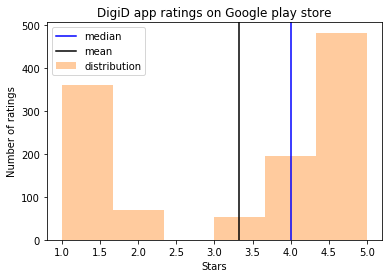

In [6]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()

print(f'The median is: {median_stars} stars')
print(f'The mean is: {mean_stars} stars')
sns.set_color_codes()

sns.distplot(df['stars'], kde=False, color="tab:orange", rug_kws=False, norm_hist=False, label="distribution")
plt.title('DigiD app ratings on Google play store')
plt.axvline(median_stars, 0, 100, color='blue', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_stars, 0, 100, color='black', label='mean') 

plt.ylabel('Number of ratings')
plt.xlabel('Stars')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.savefig('displot.png', dpi=300)

plt.show()


The average(mean) of stars of the DigiD app is not bad! It looks like the app is doing well for that period of time. This depends on the reviews scraped for this analysis. 

The middle value (median) of the stars is a better measure to find know the average rating, because it is not infleunces by extreme values. This applies here, users give DigiD either a very low(1 star)  rating or a very high (5 stars) rating.  

To see if the amount of words can tell us something about the rating, we can make a plot. 

DigiD app ratings + amount of words


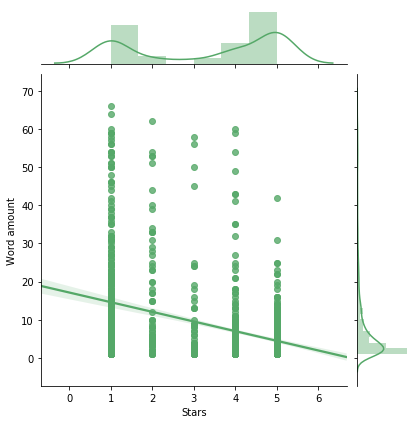

In [7]:
sns.jointplot(x="stars", y="count_words1", data=df, kind="reg", color="g");
plt.ylabel('Word amount')
plt.xlabel('Stars')
print('DigiD app ratings + amount of words')
#plt.savefig('jointplot.png', dpi=300)

The distribution of the ratings has a central tendency. The ratings are either very low or very high. The 2, 3 and for stars are low. 

It seems that most 1 star review have more words, than higher reviews.


<h3>Exploring the words</h3>

In [8]:
#importing the needed libraries
from collections import Counter #counts all the words per array
df['reviewFinal'] = df['reviewFinal'].str.lower() # converting the words into lowercases, to combine them
amount = Counter(" ".join(df["reviewFinal"]).split()).most_common(53) # getting the most common words

arr1, arr2 = [], [] #making empty lists

for i, j in amount: # putting the value's in the lists
    arr1.append(i)
    arr2.append(j)
    
d = {'word': arr1, 'count':arr2} #labelling the columns
df2 = pd.DataFrame(d) #putting all the common words into a dataframe

from nltk.corpus import stopwords #removing the stopwords
stop = stopwords.words('dutch','english') # some reviews are in English
add_stop = ['app','De','en','En','Ik','ik','App','app.','weer','heel','gewoon','zeer'] # feedback from Poster session
stop.extend(add_stop)

#detect whenever there is a stopword, and when it's not, add it to the dataframe
df2['word'] = df2['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))
df2 = df2[df2['word'] != ''] #removing the empty value's

Text(0.5, 1.0, 'Most common words in DigiD reviews')

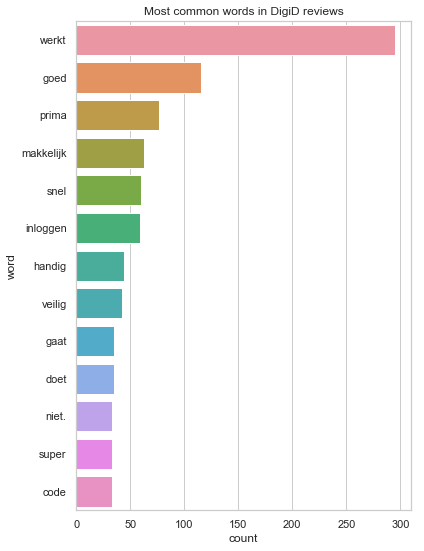

In [9]:
# creating a barplot to have a better look at the most common words (in comparison to each other)
import seaborn as sns
sns.set(style="whitegrid")
ax = plt.subplots(figsize=(6, 9))
ax = sns.barplot(x="count", y="word", data=df2)
plt.title('Most common words in DigiD reviews')
#plt.savefig('mostcommenwords.png', dpi=300)

From this plot, we can see the most common words. Some words are out of context when we look at it like this. It is unclear if they are positive or negative. But they seem like positive words. A Word Cloud could show more. 

>Intressing keywords are: veilig and inloggen

<b>Advantages of Word Clouds :</b>

<ul style="list-style-type:square;">
  <li>Analyzing feedback based on content(text)</li>
</ul>


<b>Drawbacks of Word Clouds :</b>
<ul style="list-style-type:square;">
  <li>Word Clouds are not always suited for every situation.</li>
  <li>Data should be optimized for context. </li>
</ul>

In [2]:
#importing the WordCload 
from wordcloud import WordCloud, STOPWORDS 
# Read the whole text.
text = df['reviewFinal']
result = str(text) # trun words to strings
stop_words = ["De", "en",'ik','je','app','te','wel','op','dan','van','voor','al','weer'] + list(STOPWORDS) # feedback from Poster session
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stop_words, max_font_size=70, max_words=40, background_color="white").generate(result)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png', dpi=300)


NameError: name 'df' is not defined

This WordCloud gives more insight. It seems that the app is receiving good reviews. 
To see what kind of words are beeing used to give a bad or good review, the categories are made. 

<h3> Creating a 'positive' WordCloud and a 'negative' WordCloud</h3>

In [11]:
df['starsPositive'] = df['stars'] >= 3 #when a review has equal to or more than 3 stars, it's labeled as postive
df['starsNegative'] = df['stars'] < 3 #when a review has less than 3 stars, it's labeled as negative

positive_review = df[df.starsPositive].reviewFinal #creating a new column for the new values.
negative_review = df[df.starsNegative].reviewFinal

positive_review_df = pd.DataFrame(df[df.starsPositive].reviewFinal)
negative_review_df = pd.DataFrame(df[df.starsNegative].reviewFinal)
df.head(5)


,name,reviewFinal,stars,date,count_words1,starsPositive,starsNegative
1159,Jilles Koedood,makkelijk en goed werkende app.,5,2019-12-18,5,True,False
1158,Rob Schellekens,ik probeer nu voor de derde keer (in 2 weken) ...,1,2019-12-18,45,False,True
1157,Erwin Drechsler,erg lastig als je de activatie wil voltooien d...,2,2019-12-18,31,False,True
1156,Gershwin Maarten,ik ben tevreden over de app en het is overzich...,5,2019-12-19,10,True,False
1138,Wim Koopman,"waardeloos voor ouderen, je kunt beter al je g...",1,2019-12-19,21,False,True


<h3>Creating a 'postive' Word Cloud</h3>

(-0.5, 399.5, 199.5, -0.5)

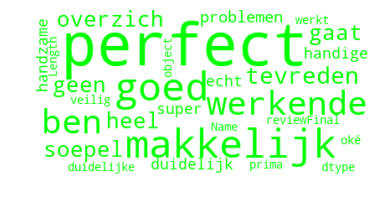

In [12]:
# Read the whole text.
text_positive = positive_review_df['reviewFinal']
result_postive = str(text_positive)
stop_words = ["app","De", "en","van","ik", "op","het","wat","deze","als","met",'een','voor','te','je','dus','weer'] + list(STOPWORDS) # feedback from Poster session
# Generate a word cloud image
wordcloud_positive = WordCloud(stopwords = stop_words,max_font_size=70, max_words=40, background_color="white", color_func=lambda *args, **kwargs: (000,887,000)).generate(result_postive)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud_postive.png', dpi=300)

<h3>Creating a 'negative' Word Cloud</h3>

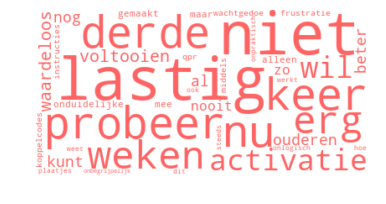

In [13]:
# Read the whole text.
text_negative = negative_review_df['reviewFinal']
result_negative = str(text_negative)

# Generate a word cloud image
wordcloud_negative = WordCloud(stopwords = stop_words, max_font_size=70, max_words=40, background_color="white", color_func=lambda *args, **kwargs: (999,100,100)).generate(result_negative)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_negative.png', dpi=300)

In [14]:
df.head(5)

,name,reviewFinal,stars,date,count_words1,starsPositive,starsNegative
1159,Jilles Koedood,makkelijk en goed werkende app.,5,2019-12-18,5,True,False
1158,Rob Schellekens,ik probeer nu voor de derde keer (in 2 weken) ...,1,2019-12-18,45,False,True
1157,Erwin Drechsler,erg lastig als je de activatie wil voltooien d...,2,2019-12-18,31,False,True
1156,Gershwin Maarten,ik ben tevreden over de app en het is overzich...,5,2019-12-19,10,True,False
1138,Wim Koopman,"waardeloos voor ouderen, je kunt beter al je g...",1,2019-12-19,21,False,True


<font color="#5c5c3d"><h2>Choosing a model</h2></font>
<h3>bag-of-words model and Naïve Bayes</h3

The <b>bag-of-words model</b> puts all the words toghther and counts them. It doesnt do anything with the meaning of the words. This could then be taken out of context. Its a simple yet effective model. 

The <b>Naïve Bayes model</b> assumes that the features used to predict, are independent. But ussually that is not the case. That's why it's called 'Naïve'. Despite that, it's workes well and is very accurate. 

With the Naïve Bayes model, we can predict if a text (based on the words) is in category B or category B. In this case, we are going to predict if a review is going to get a postive star rating(>3) or a negative star rating(<4). 

In [15]:
df['stars'].value_counts()

5    483
1    360
4    195
2     69
3     53
Name: stars, dtype: int64

In [16]:
from sklearn.feature_extraction.text import CountVectorizer #The CountVectorizer object

text = df['reviewFinal'].values.astype('U') #Taking the text from the df. We need to convert it to Unicode

vect = CountVectorizer(stop_words='english') #Create the CV object, with English stop words
vect = vect.fit(text) #We fit the model with the words from the review text
vect
feature_names = vect.get_feature_names() #Get the words from the vocabulary
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[500:520]}")

There are 1603 words in the vocabulary. A selection: ['gevonden', 'gevraagd', 'geweigerd', 'geweldig', 'geweldige', 'gewone', 'gewoon', 'geworden', 'gewéldige', 'gezamenlijke', 'gezegd', 'gezichtsherkenning', 'gezien', 'gezondheid', 'geïnstalleerd', 'geüpdatet', 'gigantisch', 'ging', 'gji', 'gmail']


In [17]:
docu_feat = vect.transform(text) #The transform method from the CountVectorizer object creates the matrix

In [18]:
y = df['stars'] #We need to take out the rating as our Y-variable
X = docu_feat #this slices the dataframe to include all rows and the columns from "action" to "metascore"

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

<b>Multinomial Naive Bayes</b>
- [x] Works wel for classification of data with discrete features (count words)
- [x] Useful for text processing
- [x] Each review will be transformed to vector of word count
- [ ] Doenst work with with negative numbers (in this case, there is are no negative numbers)

In [20]:
from sklearn.naive_bayes import MultinomialNB # importing the model from scikit-learn library
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=[0.7,.32,.21,.22,.7]) #setting the parameters
clf.fit(X_train, y_train) # adding only the train data
clf.score(X_test, y_test) # gives the mean accurracy of the test data

0.617816091954023

The model has an accurracy of 61% at the moment. This could be improved. We can find out how by making a Confusion Matrix and a Classification report.

<h3>Confusion Matrix & Classification report - round 1 </h3>

Text(0.5, 1.0, 'Confusion matrix (before improving)')

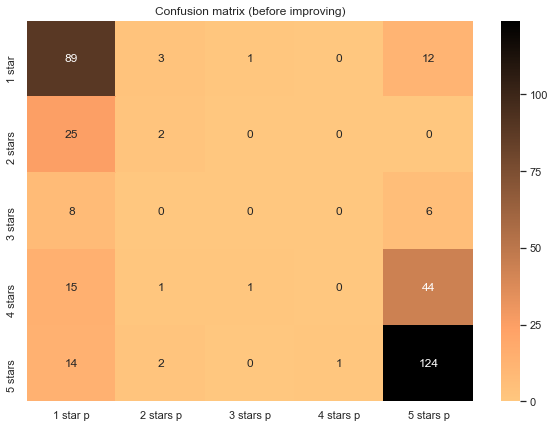

In [21]:
#In order to read it easily , let's make a dataframe, plot out of it, and add labels to it.
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_test_pred = clf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"

conf_matrix = pd.DataFrame(cm, index=['1 star', '2 stars', '3 stars', '4 stars','5 stars'], columns = ['1 star p', '2 stars p','3 stars p','4 stars p','5 stars p']) 

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True, cmap="copper_r", fmt='g') # the style of the matrix
plt.title('Confusion matrix (before improving)')
#plt.savefig('confusionMatrix.png', dpi=300)

We can see that the model is prediting the extreme's better. This could be because there are more reviews of 1 or 5 stars. The model has more material te work with than the other ratings. Adding more data about the other ratings, might improve the model. 

In [22]:
df['stars'].value_counts() # the amount of ratings 

5    483
1    360
4    195
2     69
3     53
Name: stars, dtype: int64

In [23]:
clf.classes_ #to see the labels

array([1, 2, 3, 4, 5], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
target_names = ['1 star', '2 stars', '3 stars', '4 stars','5 stars']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      1 star       0.59      0.85      0.70       105
     2 stars       0.25      0.07      0.11        27
     3 stars       0.00      0.00      0.00        14
     4 stars       0.00      0.00      0.00        61
     5 stars       0.67      0.88      0.76       141

   micro avg       0.62      0.62      0.62       348
   macro avg       0.30      0.36      0.31       348
weighted avg       0.47      0.62      0.53       348



<b>Classification report</b>



<b>recall: </b>
>How many of the real X star is predicted as X star? 
>The model is doing well with the recall of the 1 and 5 star reviews. 

<b>precision: </b>
>How many of the predicted X star reviews are actually X star? 
>The model can predict that 59% of 1 star ratings are 1 star ratings, but for the 2 stars it only 25%. 

The model is doing well for the extreme ratings, because there is more data about them, than for the others. 


# Improving the model

Because there is not much data about the 2,3 and 4 ratings, we can put categorize them. The model could then be improved if two categories are made, instead of 5.

In [25]:
# make a new df
df_round_2 = df[['name','stars','reviewFinal']]
df_round_2 .head(5)

# making two categories out of the star ratings
for row in range(0, len(df_round_2 )):
    if (df_round_2 .iloc[row, 1] > 3):
        df_round_2 .iloc[row, 1] = "positive"
    else:
        df_round_2 .iloc[row, 1] = "negative"
        
df_round_2 

C:\Users\geja_\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\geja_\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\geja_\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,name,stars,reviewFinal
1159,Jilles Koedood,positive,makkelijk en goed werkende app.
1158,Rob Schellekens,negative,ik probeer nu voor de derde keer (in 2 weken) ...
1157,Erwin Drechsler,negative,erg lastig als je de activatie wil voltooien d...
1156,Gershwin Maarten,positive,ik ben tevreden over de app en het is overzich...
1138,Wim Koopman,negative,"waardeloos voor ouderen, je kunt beter al je g..."
...,...,...,...
26,Rita Verweij,positive,handzame/duidelijke app! perfect.
25,Monique Stevens,negative,oké
24,Mau Tricia,positive,veilig en prima
33,Pearl Uyttenhove,negative,voor de uodates van deze klote appp moest ik v...


In [26]:
df_round_2['stars'].value_counts()

positive    678
negative    482
Name: stars, dtype: int64

In [27]:
from sklearn.feature_extraction import text 
text_2 = df_round_2['reviewFinal'].values.astype('U') #Taking the text from the df. We need to convert it to Unicode

#stop_words_round2 = ["mensen","De", "en","van","ik", "op","het","wat","deze","als","met"]
#text_2= [word for word in text_2 if word not in stop_words_round2]

vect_2 = CountVectorizer(stop_words='dutch') #Create the CV object, with English stop words

vect_2 = vect.fit(text_2) #We fit the model with the words from the review text
feature_names_2 = vect.get_feature_names() #Get the words from the vocabulary
print(f"There are {len(feature_names_2)} words in the vocabulary. A selection: {feature_names[500:520]}")

There are 1603 words in the vocabulary. A selection: ['gevonden', 'gevraagd', 'geweigerd', 'geweldig', 'geweldige', 'gewone', 'gewoon', 'geworden', 'gewéldige', 'gezamenlijke', 'gezegd', 'gezichtsherkenning', 'gezien', 'gezondheid', 'geïnstalleerd', 'geüpdatet', 'gigantisch', 'ging', 'gji', 'gmail']


In [28]:
docu_feat_2 = vect.transform(text_2) #The transform method from the CountVectorizer object creates the matrix
y = df_round_2['stars'] #We need to take out the rating as our Y-variable
X = docu_feat_2 #this slices the dataframe to include all rows and the columns from "action" to "metascore"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

from sklearn.naive_bayes import MultinomialNB # importing the model from scikit-learn library
clf_2 = MultinomialNB() #setting the parameters, default works best
clf_2.fit(X_train, y_train) # adding only the train data
clf_2.score(X_test, y_test) # gives the mean accurracy of the test data

0.8879310344827587

That looks better! Now making a second confusion matrix, the prediction can be analized further.

In [29]:
df_round_2['stars'].value_counts(normalize=True)

positive    0.584483
negative    0.415517
Name: stars, dtype: float64

In [30]:
clf_2.classes_ # to see the labels

array(['negative', 'positive'], dtype='<U8')

<h3>Confusion Matrix & Classification report - round 2 </h3>

Text(0.5, 1.0, 'Confusion matrix (after improvement)')

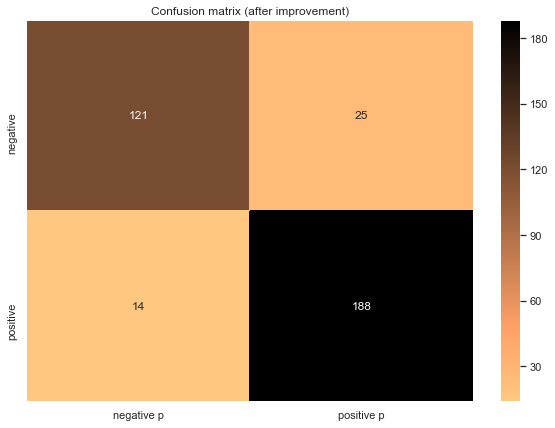

In [31]:
y_test_pred_2 = clf_2.predict(X_test) #the predicted values
cm_2 = confusion_matrix(y_test, y_test_pred_2) #creates a "confusion matrix"

conf_matrix_2 = pd.DataFrame(cm_2, index=['negative', 'positive'], columns = ['negative p', 'positive p']) 

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix_2, annot=True, cmap="copper_r", fmt='g') # the style of the matrix
plt.title('Confusion matrix (after improvement)')
#plt.savefig('confusionMatrix.png', dpi=300)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_2))

              precision    recall  f1-score   support

    negative       0.90      0.83      0.86       146
    positive       0.88      0.93      0.91       202

   micro avg       0.89      0.89      0.89       348
   macro avg       0.89      0.88      0.88       348
weighted avg       0.89      0.89      0.89       348



The model is doing much better now. 

>recall: The model is doing better with the recall of compared to round 1. 

>precision: The model can predict that 90% of negative ratings are indeed negative.

<font color="#5c5c3d"><h2>Evaluation</h2></font>

By looking at the model in detail, we can analize and evaluate the model better. 

In [33]:
# creating new columns with the predicting outcome in the main dataframe
df_round_2["Negative probabilty"] = 0
df_round_2["Positive probabilty"] = 0

for i in range(0, len(df_round_2)):
    prob = clf_2.predict_proba(X[i])
    df_round_2["Negative probabilty"].iloc[i] = prob[0,0]
    df_round_2["Positive probabilty"].iloc[i] = prob[0,1]
    
df_round_2['Positive probabilty'].value_counts(normalize=True)
df_round_2['Negative probabilty'].value_counts(normalize=True)

pd.set_option('display.float_format', '{:.4f}'.format) # convert scientific notation 
df_round_2.head(5)

C:\Users\geja_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\geja_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\geja_\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

,name,stars,reviewFinal,Negative probabilty,Positive probabilty
1159,Jilles Koedood,positive,makkelijk en goed werkende app.,0.0003,0.9997
1158,Rob Schellekens,negative,ik probeer nu voor de derde keer (in 2 weken) ...,1.0000,0.0000
1157,Erwin Drechsler,negative,erg lastig als je de activatie wil voltooien d...,1.0000,0.0000
1156,Gershwin Maarten,positive,ik ben tevreden over de app en het is overzich...,0.0106,0.9894
1138,Wim Koopman,negative,"waardeloos voor ouderen, je kunt beter al je g...",1.0000,0.0000


In [34]:
# creating a for loop to see what the review was, the rating and the probabilty %
for i in range(5):
    prob = clf_2.predict_proba(X[i]) # probabilty function
    print(f"Review by: {i}. {df_round_2.iloc[i,0]}") 
    print(df_round_2.iloc[i, 2]) 
    print(df_round_2.iloc[i, 1])
    print(f"Negative: {prob[0,0]}, Positive: {prob[0,1]}")

Review by: 0. Jilles Koedood
makkelijk en goed werkende app.
positive
Negative: 0.0003041133397763022, Positive: 0.9996958866602247
Review by: 1. Rob Schellekens
ik probeer nu voor de derde keer (in 2 weken) de update te installeren. lukt niet. blijft hangen in "wachten op downloaden". daar zal dan wel "heel lang wachten" mee bedoelt worden. ik kan dus niet bij m'n berichten. wie heeft dat eigenlijk onder beheer?
negative
Negative: 0.9999999999994884, Positive: 5.053350536280043e-13
Review by: 2. Erwin Drechsler
erg lastig als je de activatie wil voltooien door een id bewijs tegen de achterkant van je telefoon te houden en er vervolgens niets gebeurd... werkt weer als de overheid.... niet
negative
Negative: 0.9999999196790302, Positive: 8.032097882397885e-08
Review by: 3. Gershwin Maarten
ik ben tevreden over de app en het is overzichtelijk.
positive
Negative: 0.010560917982779229, Positive: 0.9894390820172233
Review by: 4. Wim Koopman
waardeloos voor ouderen, je kunt beter al je gegev

The accuraccy for most reviews is pretty high. But I would like to see where it goes wrong. 

In [35]:
# creating a new dataframe with the wrong predictions (with the accuraccy of more than 90%)
df_wrong_prediction = df_round_2[(df_round_2.stars == "positive") & (df_round_2["Positive probabilty"] < 0.10)].iloc[0:10]
df_wrong_prediction

,name,stars,reviewFinal,Negative probabilty,Positive probabilty
1136,Failed to load Please try again,positive,alles ging goed tot ik me inloggegevens vergat...,1.0000,0.0000
1083,ArieJan Hoogeboom,positive,waarom elke keer update? krijg hem niet opgeda...,0.9911,0.0089
1093,Marc Stout,positive,ik moet steeds op nieuw de qr code scannen ter...,1.0000,0.0000
994,Wyb Bijlsma,positive,"is op dit moment moeilijk te downloaden, te ve...",0.9643,0.0357
749,Joke de Wit,positive,hoe vaak moet ik inloggen om eindelijk bij m'n...,0.9743,0.0257
647,Loes Spekman,positive,het is wat verwarrend. als je bent ingelogd he...,1.0000,0.0000
105,Floris Aukema,positive,app werkt goed. alleen vind ik dat ik overbodi...,1.0000,0.0000
73,JAS Wimmenhove,positive,lastig al die updaten. die uren duren,0.9958,0.0042
20,Loes Vd Bergh,positive,het scannen gaat wat lastig,0.9380,0.0620


In [36]:
# creating a new dataframe with the right predictions (with the accuraccy of more than 90%)
pd.set_option('display.max_colwidth', -1) # to view the whole text
df_right_prediction = df_round_2[(df_round_2.stars == "negative") & (df_round_2["Negative probabilty"] > 0.90)].iloc[0:30]
df_right_prediction.head(5)

,name,stars,reviewFinal,Negative probabilty,Positive probabilty
1158,Rob Schellekens,negative,"ik probeer nu voor de derde keer (in 2 weken) de update te installeren. lukt niet. blijft hangen in ""wachten op downloaden"". daar zal dan wel ""heel lang wachten"" mee bedoelt worden. ik kan dus niet bij m'n berichten. wie heeft dat eigenlijk onder beheer?",1.0000,0.0000
1157,Erwin Drechsler,negative,erg lastig als je de activatie wil voltooien door een id bewijs tegen de achterkant van je telefoon te houden en er vervolgens niets gebeurd... werkt weer als de overheid.... niet,1.0000,0.0000
1138,Wim Koopman,negative,"waardeloos voor ouderen, je kunt beter al je gegevens aan iemand geven, maar ja dan heb je weer de priviciewet .",1.0000,0.0000
1141,Wim Kloonen,negative,nog nooit zo een onduidelijke app mee gemaakt.,0.9841,0.0159
1148,D. Broekhuis,negative,waarom zo moeilijk er kan toch ook een makkelijke veilige manier van activeren zijn,0.9746,0.0254


<b>Possible scenario's</b>

The reviews rated as negative but were positive many words (compared to other good reviews we have seen). From the previous word count plot, it showed that the more words, the lower the rating. This could be the reason why the prediction was off. 

Also, there are certain similarities between the words used, such as 'werkt'. And words such as 'veilig' (save). The context matters. A user might say the app is 'not' <b>save</b> or 'feels' <b>save.</b> This might also be a factor. I would consider removing certain words that occur in both categories. 

<h3>Conclusion</h3>

<h4> Another WordCloud </h4>

From a model like this, the DigiD developers could find the obstacles for users so that the app can be improved. The model clusters negative and positive reviews based on certain factors. Finding the main factors for clustering the groups, developers could find an opportunity to improve the app. A WordCloud could give insight.

(-0.5, 399.5, 199.5, -0.5)

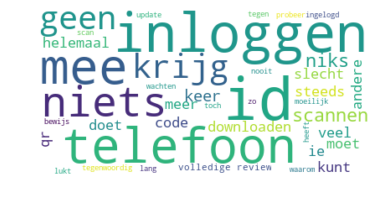

In [37]:
# Read the whole text.
text_final = df_right_prediction['reviewFinal']
result_final = str(text_final) # trun words to strings
stop_words = ["De", "en",'ik','je','app','te','wel','op','dan','van','voor','al','weer','nog',
              'die','een','het','om','met','dit','wat','dat', 'als', 'aan', 'naar', 'bij', 'dat',
              'nu', 'en', 'de', 'om', 'onder', 'ons', 'met', "deze", 'ook', "dit", "die",'er','dus','mijn','maar',
              "haar", "uit", "hierin", "hoe", "over", "wie","na", "zijn", 'werkt','worden', 'niet','kan','waardeloos','alleen'] + list(STOPWORDS) # feedback from Poster session
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stop_words, max_font_size=70, max_words=40, background_color="white").generate(result_final)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud.png', dpi=300)

From this WordCloud, it seems that users have problems with:
<li> loggin </li>
<li> scanning </li>
<li> there seem to be a problem with openen (running the app?)</li>
<li> and taxes. </li>


>To improve the DigiD app, the government could look into these matters. By doing so, the user experience increases, including trust in the relationship with DigiD.

<font color="#5c5c3d"><h2>Top 5!</h2></font>

DigiD is also doing things right, below the top 5 best predicted positive reviews!

In [38]:
df_round_2 = df_round_2.sort_values(by='Negative probabilty') 
df_round_2.head(5)

,name,stars,reviewFinal,Negative probabilty,Positive probabilty
322,Ramon Koendjbiharie,positive,"prima app. heel makkelijk en simpel opgezet. snel, erg handig. dank je digid. ga zo door",0.0000,1.0000
377,mg proos,positive,werkt goed bij mij.lekker handig!! en snel en naar mijn gevoel goed safe. eerst qr code scannen en daarna pincode 5 cijfers.,0.0000,1.0000
695,Harmjan Niks,positive,"prima app, die ik dagelijks check en gebruik, en bevat superhandige functies! ik zou zeggen: download en installeer en ervaar het gebruiksgemak zelf!!!",0.0000,1.0000
669,Jannie Braal,positive,werkt prima en snel. heel handig hulpmiddel,0.0000,1.0000
930,Rik Janssen,positive,"doet wat het moet doen. makkelijk inloggen. al snap ik de verwarring dat mensen denken alles in te kunnen zien mbt digid. nee dat is het niet, het zorgt ervoor dat je veilig in kan loggen en enkel 5 cijfers hoeft te onthouden.",0.0000,1.0000


<b>Refrences</b>

Abu-Shanab, E., & Harb, Y. (2019). E-government research insights: Text mining analysis. Electronic Commerce Research and Applications, 38, 100892.

De Pelsmacker, P., Dens, N., & Kolomiiets, A. (2018). 
The impact of text valence, star rating and rated usefulness in online reviews. 
International Journal of Advertising, 37(3), 340-359.